In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from joblib import dump

# Carregar os dados de treino e teste
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', header=None)

# Separar os conjuntos de treino e teste
X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
X_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values

# Definir os modelos para a validação cruzada e treinamento
models = {
    'SVC': make_pipeline(StandardScaler(), SVC(kernel='linear')),
    'RandomForest': RandomForestClassifier(),
    'MLPClassifier': make_pipeline(StandardScaler(), MLPClassifier()),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Realizar a validação cruzada no conjunto de treino e salvar os modelos treinados
for name, model in models.items():
    # Validação cruzada com paralelização de todos os núcleos do processador
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    print(f'{name}: Acurácia média = {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')
    
    # Treinar o modelo com o conjunto de treino
    model.fit(X_train, y_train)
    
    # Avaliar o modelo com o conjunto de teste
    test_score = model.score(X_test, y_test)
    print(f'{name}: Acurácia no conjunto de teste = {test_score:.2f}')
    
    # Salvar o modelo treinado
    dump(model, f'{name}_model.joblib')


SVC: Acurácia média = 0.92 (+/- 0.00)
SVC: Acurácia no conjunto de teste = 0.92
RandomForest: Acurácia média = 0.97 (+/- 0.00)
RandomForest: Acurácia no conjunto de teste = 0.97


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier: Acurácia média = 0.97 (+/- 0.00)
MLPClassifier: Acurácia no conjunto de teste = 0.98
AdaBoost: Acurácia média = 0.87 (+/- 0.02)
AdaBoost: Acurácia no conjunto de teste = 0.87
GradientBoosting: Acurácia média = 0.96 (+/- 0.00)
GradientBoosting: Acurácia no conjunto de teste = 0.96
XGBoost: Acurácia média = 0.98 (+/- 0.00)
XGBoost: Acurácia no conjunto de teste = 0.98


In [9]:
import numpy as np


[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


In [26]:
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)

print("Número de classes no conjunto de treino:", np.unique(y_train))
print("Número de classes no conjunto de teste:", np.unique(y_test))

# Imprimir as classes únicas e suas contagens para o conjunto de treino
print("Classes e contagens no conjunto de treino:")
for unique, count in zip(unique_classes_train, counts_train):
    print(f"Classe {unique}: {count} batimentos")
print("Total de batimentos no conjunto de treino:", y_train.shape[0])
# Imprimir as classes únicas e suas contagens para o conjunto de teste
print("\nClasses e contagens no conjunto de teste: ")
for unique, count in zip(unique_classes_test, counts_test):
    print(f"Classe {unique}: {count} batimentos")
print("Total de batimentos no conjunto de teste:", y_test.shape[0])

Número de classes no conjunto de treino: [0. 1. 2. 3. 4.]
Número de classes no conjunto de teste: [0. 1. 2. 3. 4.]
Classes e contagens no conjunto de treino:
Classe 0.0: 72471 batimentos
Classe 1.0: 2223 batimentos
Classe 2.0: 5788 batimentos
Classe 3.0: 641 batimentos
Classe 4.0: 6431 batimentos
Total de batimentos no conjunto de treino: 87554

Classes e contagens no conjunto de teste: 
Classe 0.0: 18118 batimentos
Classe 1.0: 556 batimentos
Classe 2.0: 1448 batimentos
Classe 3.0: 162 batimentos
Classe 4.0: 1608 batimentos
Total de batimentos no conjunto de teste: 21892


Relatório de Classificação para SVC:
              precision    recall  f1-score   support

    Classe 1       0.92      0.99      0.96     18118
    Classe 2       0.91      0.49      0.63       556
    Classe 3       0.82      0.28      0.42      1448
    Classe 4       0.63      0.41      0.49       162
    Classe 5       0.98      0.87      0.92      1608

    accuracy                           0.92     21892
   macro avg       0.85      0.61      0.69     21892
weighted avg       0.92      0.92      0.91     21892

Matriz de Confusão para SVC:
[[18020    27    57     2    12]
 [  266   271    17     2     0]
 [  989     1   410    35    13]
 [   93     0     3    66     0]
 [  196     0    14     0  1398]]


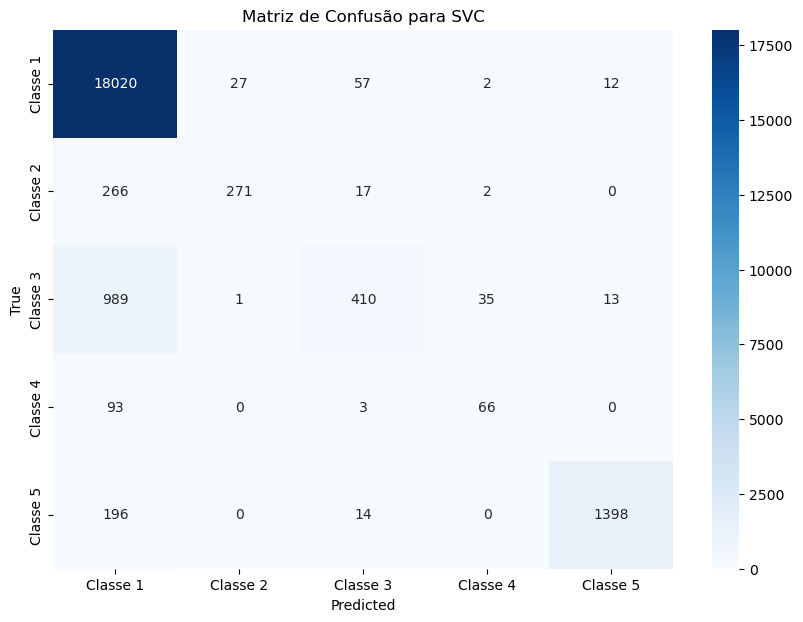

Relatório de Classificação para RandomForest:
              precision    recall  f1-score   support

    Classe 1       0.97      1.00      0.99     18118
    Classe 2       0.98      0.60      0.74       556
    Classe 3       0.98      0.88      0.93      1448
    Classe 4       0.88      0.65      0.74       162
    Classe 5       0.99      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.81      0.87     21892
weighted avg       0.97      0.97      0.97     21892

Matriz de Confusão para RandomForest:
[[18100     7     8     0     3]
 [  221   333     1     0     1]
 [  152     1  1275    15     5]
 [   46     0    11   105     0]
 [   89     0     3     0  1516]]


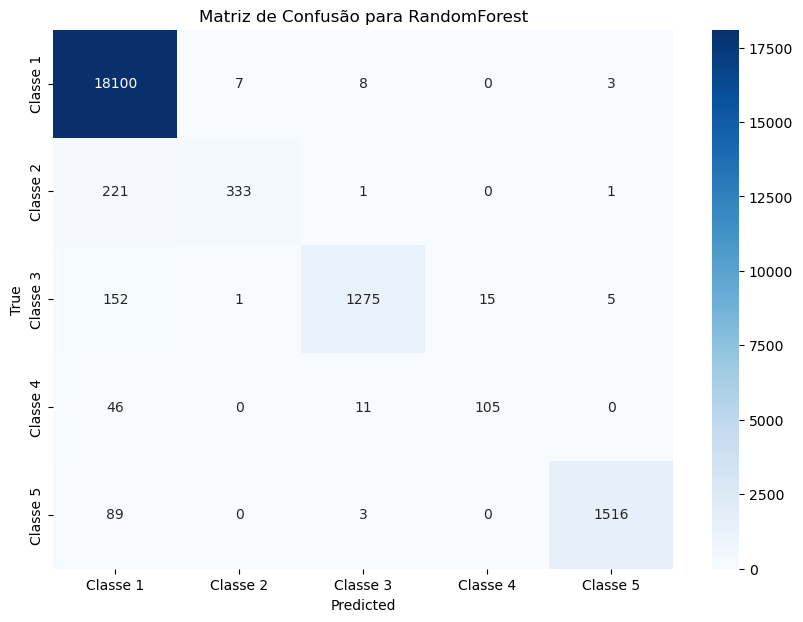

Relatório de Classificação para MLPClassifier:
              precision    recall  f1-score   support

    Classe 1       0.99      0.99      0.99     18118
    Classe 2       0.77      0.73      0.75       556
    Classe 3       0.94      0.93      0.93      1448
    Classe 4       0.74      0.81      0.77       162
    Classe 5       0.97      0.98      0.97      1608

    accuracy                           0.98     21892
   macro avg       0.88      0.89      0.88     21892
weighted avg       0.98      0.98      0.98     21892

Matriz de Confusão para MLPClassifier:
[[17900   102    65    18    33]
 [  137   407     8     2     2]
 [   59    13  1345    26     5]
 [   19     1     9   131     2]
 [   26     4     9     0  1569]]


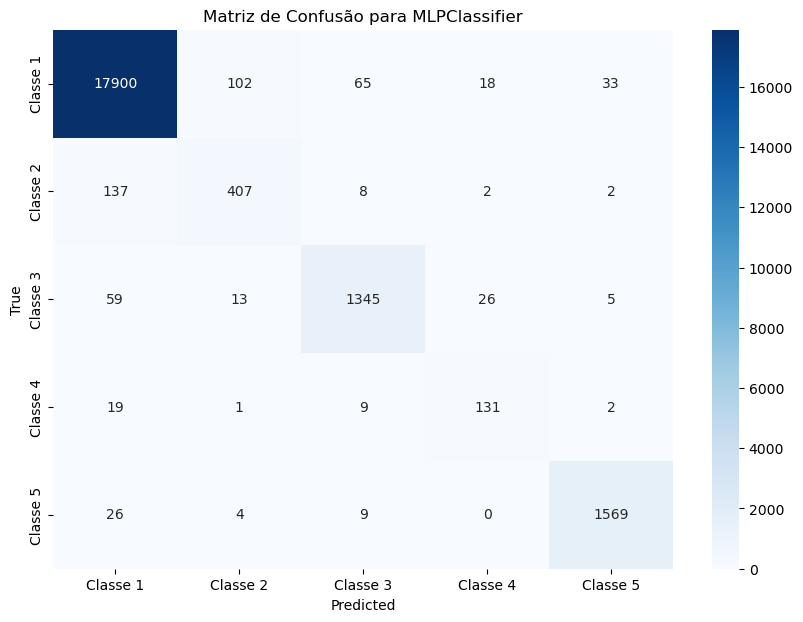

Relatório de Classificação para AdaBoost:
              precision    recall  f1-score   support

    Classe 1       0.90      0.95      0.93     18118
    Classe 2       0.49      0.04      0.07       556
    Classe 3       0.49      0.49      0.49      1448
    Classe 4       0.06      0.01      0.01       162
    Classe 5       0.77      0.61      0.68      1608

    accuracy                           0.87     21892
   macro avg       0.54      0.42      0.44     21892
weighted avg       0.85      0.87      0.85     21892

Matriz de Confusão para AdaBoost:
[[17226     7   652    13   220]
 [  524    21     5     1     5]
 [  655    15   705     3    70]
 [  153     0     8     1     0]
 [  563     0    61     0   984]]


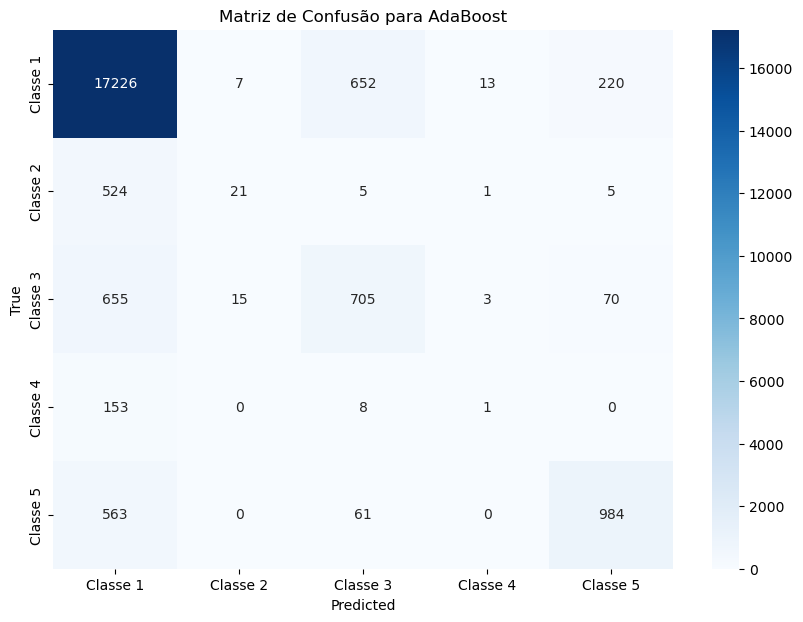

Relatório de Classificação para GradientBoosting:
              precision    recall  f1-score   support

    Classe 1       0.97      1.00      0.98     18118
    Classe 2       0.93      0.58      0.72       556
    Classe 3       0.95      0.82      0.88      1448
    Classe 4       0.70      0.49      0.58       162
    Classe 5       0.98      0.92      0.95      1608

    accuracy                           0.96     21892
   macro avg       0.91      0.76      0.82     21892
weighted avg       0.96      0.96      0.96     21892

Matriz de Confusão para GradientBoosting:
[[18035    19    37    11    16]
 [  226   323     5     0     2]
 [  230     3  1186    23     6]
 [   69     0    13    80     0]
 [  119     1     3     0  1485]]


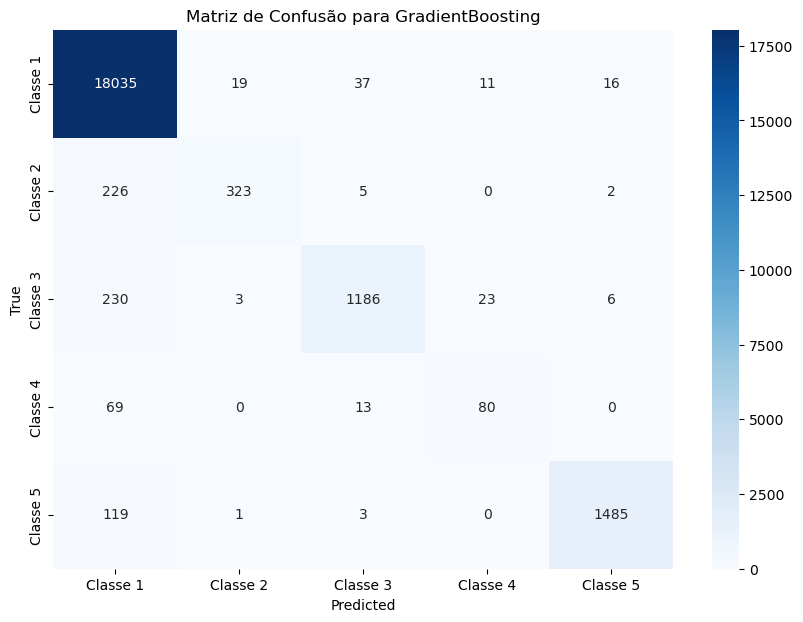

Relatório de Classificação para XGBoost:
              precision    recall  f1-score   support

    Classe 1       0.98      1.00      0.99     18118
    Classe 2       0.94      0.68      0.79       556
    Classe 3       0.97      0.92      0.95      1448
    Classe 4       0.88      0.72      0.79       162
    Classe 5       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.95      0.86      0.90     21892
weighted avg       0.98      0.98      0.98     21892

Matriz de Confusão para XGBoost:
[[18074    21    16     1     6]
 [  169   380     6     0     1]
 [   88     2  1338    15     5]
 [   33     0    13   116     0]
 [   40     1     3     0  1564]]


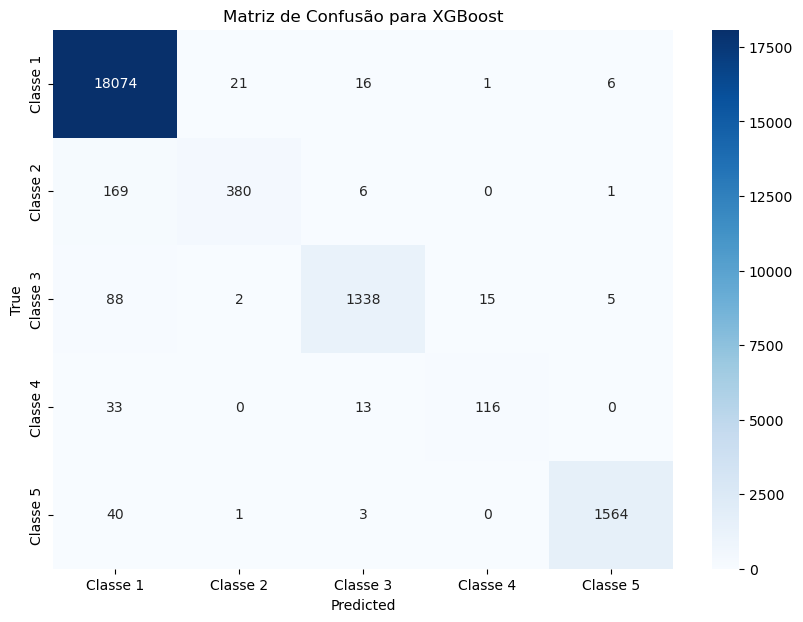

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você tenha um dicionário 'models' com seus modelos já treinados
# e que 'X_test' e 'y_test' são seus dados de teste.

for name, model in models.items():
    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Gerar relatório de classificação
    report = classification_report(y_test, y_pred, target_names=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
    print(f'Relatório de Classificação para {name}:\n{report}')
    
    # Gerar e plotar a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matriz de Confusão para {name}:\n{cm}')
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Matriz de Confusão para {name}')
    plt.show()
